# The Sparks Foundation - Graduate Rotational Internship Program (GRIP) May'21

# Task 1 : Prediction Using Supervised ML

Description : Prediction of percentage of a student based on the number of study hours using Linear Regression

Dataset : "http://bit.ly/w-data"

Language Used : Python

Author:- Debanjana Saha

In [6]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
#Reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported!")
data.head(10)

Data imported!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


The data points are plotted on a 2D graph to see if we can manually build any relationship between the data.The following code is used to create the plot.

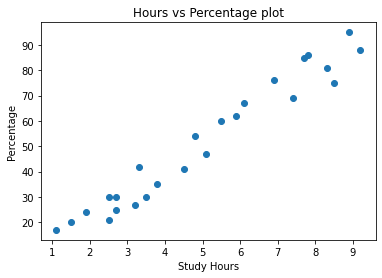

In [5]:
#Plotting the score distribution
%matplotlib inline
plt.title("Hours vs Percentage plot")
plt.xlabel("Study Hours")
plt.ylabel("Percentage")
plt.scatter(data.Hours,data.Scores)

## Preparing the Data

Data is divided into "attributes"(inputs) and "labels"(outputs).

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

As data is already divided into attributes and labels, this data is further splitted into training and test sets. It is done with the help of Scikit-Learn's built in train_test_split method.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Training the Algorithm
After splitting the data into training and testing sets, the algorithm is trained.

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Training completed")

Training completed


In [10]:
#Values of coefficient and intercept
print("Regressor coefficient :",reg.coef_)
print("Regressor intercept :",reg.intercept_)

Regressor coefficient : [9.29442874]
Regressor intercept : 5.731010227947067


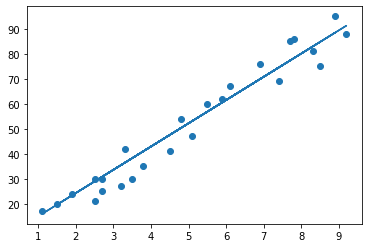

In [11]:
# Plotting of regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions
As algorithm is already trained, we can make some predictions .

In [12]:
#Visualize testing data(in hours)
print(X_test)
#Predicting the scores
y_pred = reg.predict(X_test)

[[3.8]
 [6.9]
 [6.1]
 [2.5]
 [3.5]
 [2.7]
 [3.2]]


In [13]:
# Comparing actual vs predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,35,41.049839
1,76,69.862569
2,67,62.427026
3,21,28.967082
4,30,38.261511
5,30,30.825968
6,27,35.473182


In [14]:
#Testing with own data
#What will be predicted score if a student studies for 9.25 hrs/day?
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.7044760358851


## Evaluating the Model
The final step of the task is to evaluate the performance of the algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here,the mean square error is chosen.

In [15]:
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  6.041141181574728
